**Vamos experimentar agora o algoritmo Decision Tree?**

In [4]:
!pip -q install yellowbrick

In [31]:
# Importações iniciais
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from yellowbrick.classifier import ConfusionMatrix

In [18]:
import pickle
with open('titanic.pkl', 'rb') as f:
    X_treino, X_teste, y_treino, y_teste = pickle.load(f)


Definindo GridSearch


In [20]:
modelo = GridSearchCV(DecisionTreeClassifier(), params, cv=10)
modelo.fit(X_treino, y_treino)
print(modelo.best_params_)
print(modelo.best_score_)

# Usar os melhores parâmetros do GridSearch
modelo = modelo.best_estimator_  # Ou DecisionTreeClassifier(**modelo.best_params_)
modelo.fit(X_treino, y_treino)


{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.8258607198748044


DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)

Gerar previsoes

In [25]:

previsoes = modelo.predict(X_teste)

**Importando a biblioteca de ajuste de hiperparâmetros**

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [27]:
print("Acurácia:", accuracy_score(y_teste, previsoes))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_teste, previsoes))
print("\nRelatório de Classificação:")
print(classification_report(y_teste, previsoes))

Acurácia: 0.7988826815642458

Matriz de Confusão:
[[92 13]
 [23 51]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



Matriz de confusão

/usr/local/lib/python3.11/dist-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


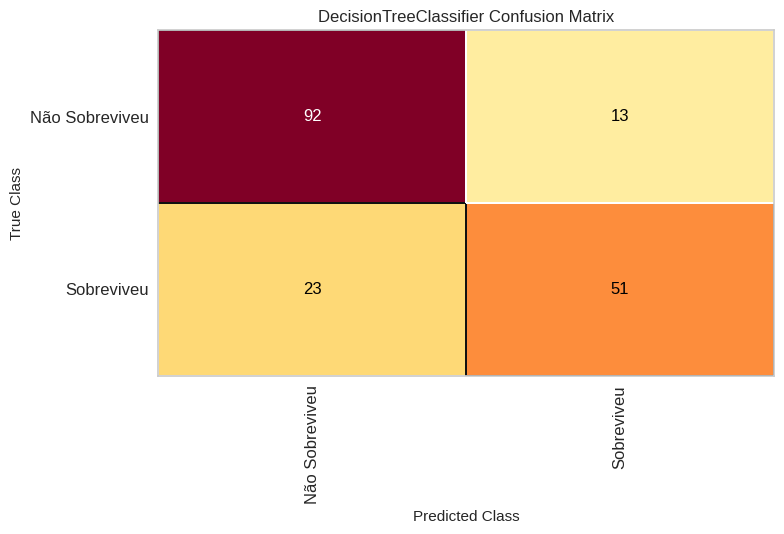

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [28]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(modelo, classes=['Não Sobreviveu', 'Sobreviveu'])
cm.score(X_teste, y_teste)
cm.show()

Visualizar Arvore

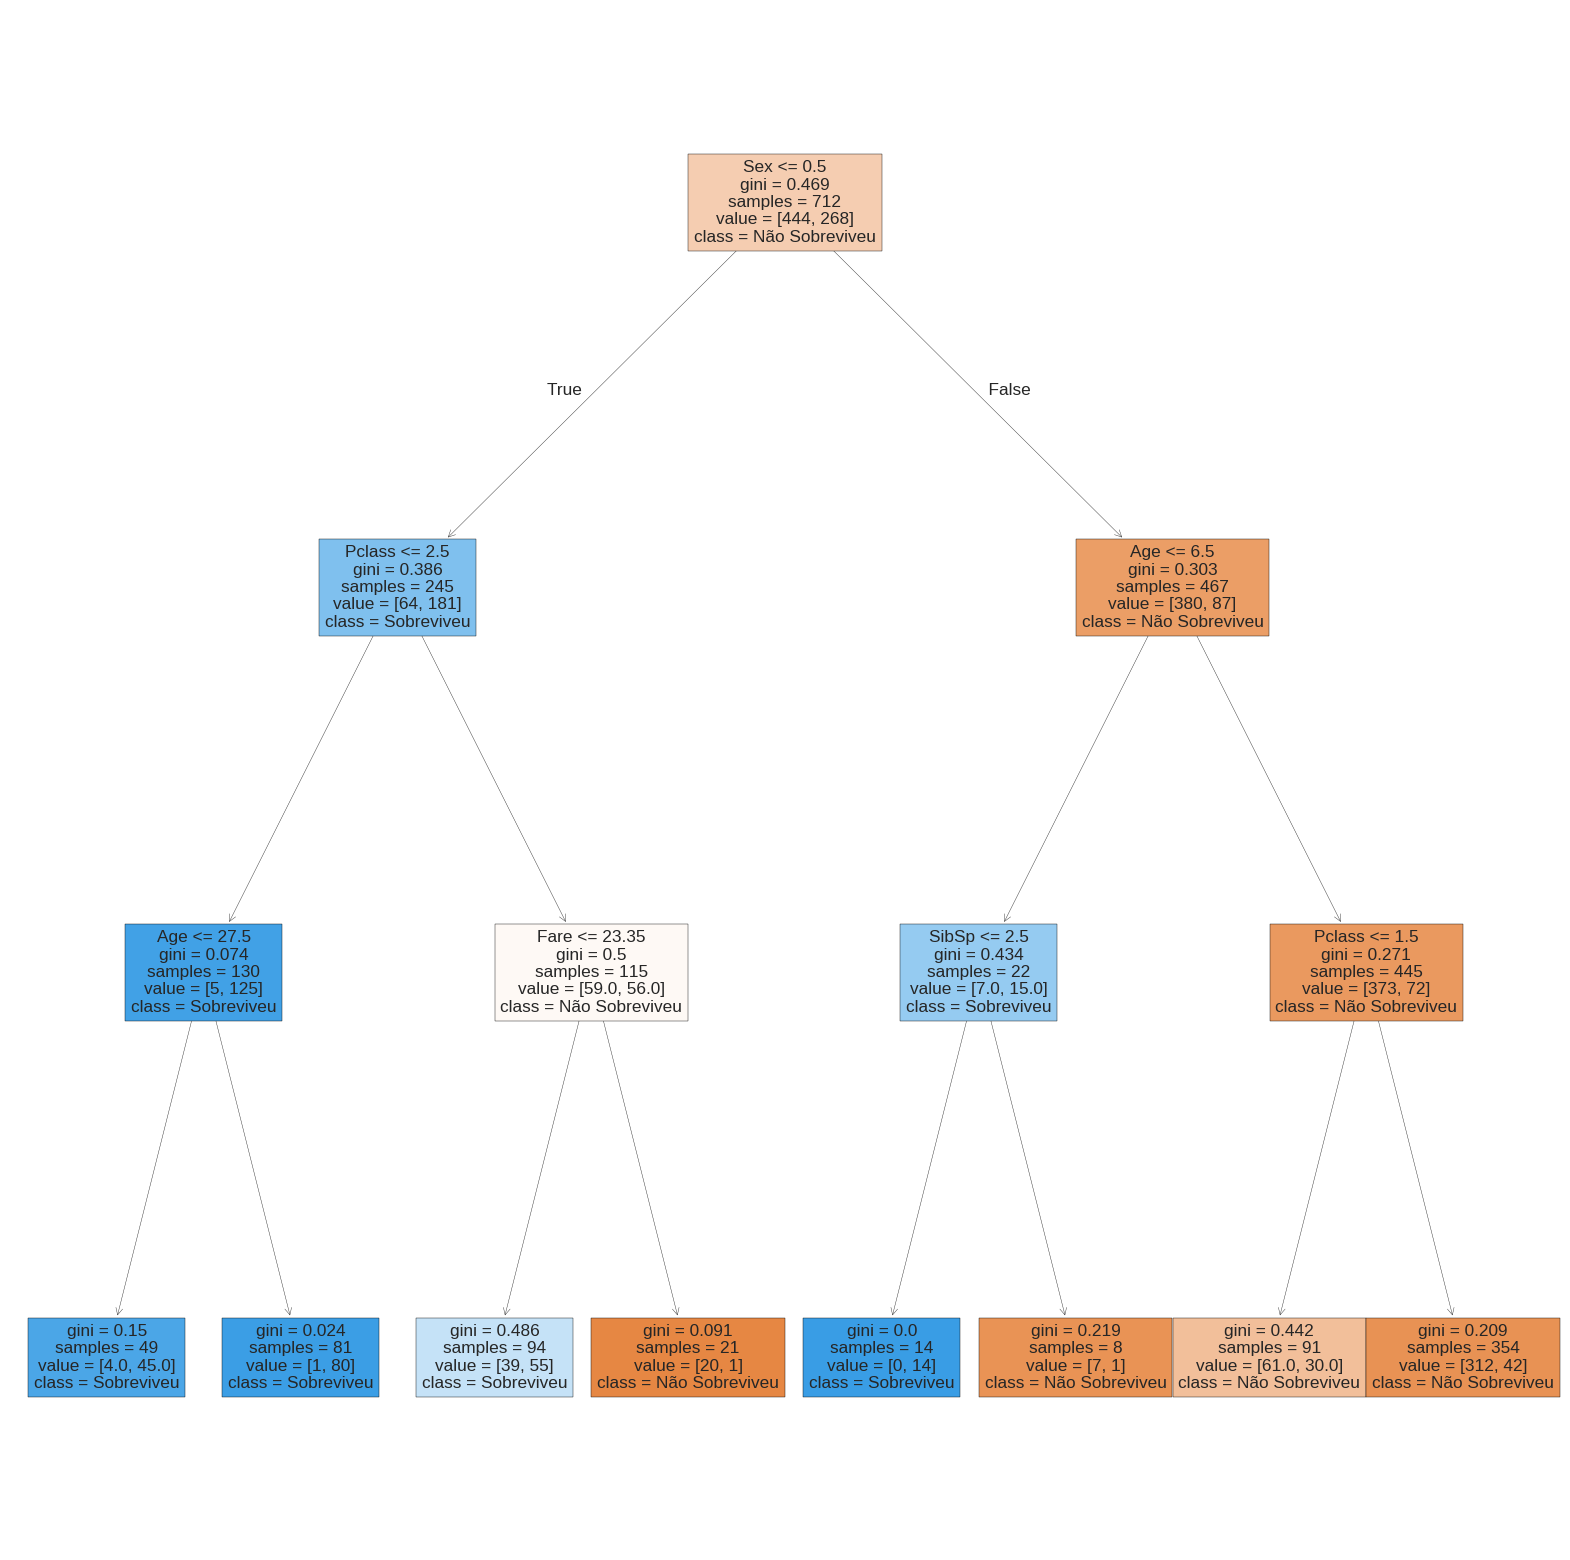

In [32]:
previsores = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
plt.figure(figsize=(20,20))
tree.plot_tree(modelo, feature_names=previsores, class_names=['Não Sobreviveu', 'Sobreviveu'], filled=True)
plt.show()

Plotando graficos

Importando bibliotecas importantes

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

Juntar dados do treino para analise

In [33]:
df_treino = X_treino.copy()
df_treino['Survived'] = y_treino

Configurar estilos dos graficos

In [35]:
sns.set_style("whitegrid")
plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

Grafico 1: Sobrevivência por Classe e Sexo


Text(0.5, 0, 'Classe')

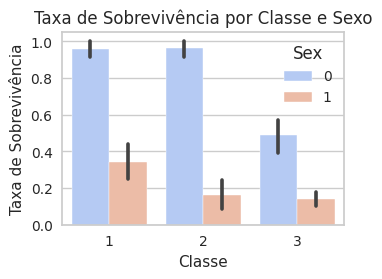

In [36]:
plt.subplot(2, 2, 1)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_treino, palette='coolwarm')
plt.title('Taxa de Sobrevivência por Classe e Sexo')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('Classe')

Grafico 2: Distribuição de Idades dos Sobreviventes

Text(0, 0.5, 'Contagem')

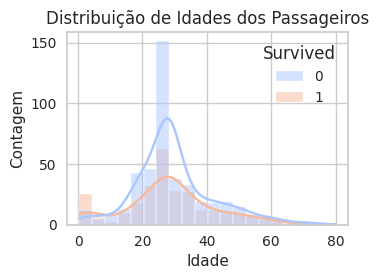

In [37]:
plt.subplot(2, 2, 2)
sns.histplot(data=df_treino, x='Age', hue='Survived', bins=20, kde=True, palette='coolwarm')
plt.title('Distribuição de Idades dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Contagem')

Grafico 3: Sobrevivência por Porto de Embarque

<ipython-input-38-891c925796bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df_treino, palette='viridis')


Text(0, 0.5, 'Taxa de Sobrevivência')

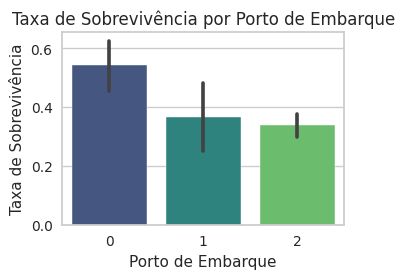

In [38]:
plt.subplot(2, 2, 3)
sns.barplot(x='Embarked', y='Survived', data=df_treino, palette='viridis')
plt.title('Taxa de Sobrevivência por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Taxa de Sobrevivência')

Grafico 4: Tarifa vs Sobrevivência por Classe

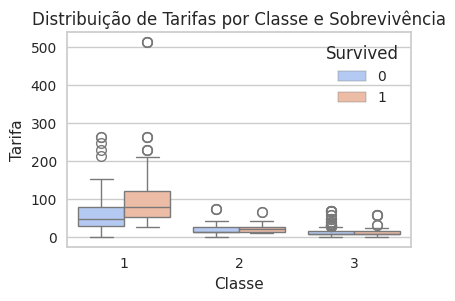

In [39]:
plt.subplot(2, 2, 4)
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df_treino, palette='coolwarm')
plt.title('Distribuição de Tarifas por Classe e Sobrevivência')
plt.xlabel('Classe')
plt.ylabel('Tarifa')

plt.tight_layout()
plt.show()


Heatmap de correlação

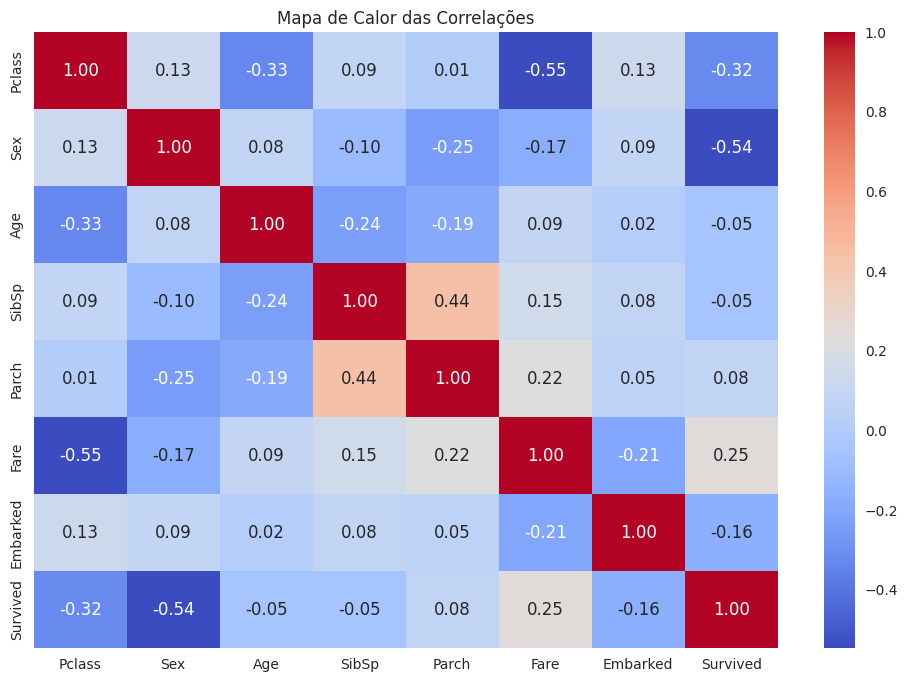

In [40]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_treino.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações')
plt.show()